## 2. What is the shape of "movies.csv"?

In [63]:
import pandas as pd
filepath="movies.csv"
movies_df=pd.read_csv(filepath)

In [64]:
movies_df.shape

(9742, 3)

## 3)What is the shape of "ratings.csv"?

In [66]:
filepath1="ratings.csv"
ratings_df=pd.read_csv(filepath1)
ratings_df.shape

(100836, 4)

## 4)How many unique "userId" are available in "ratings.csv"?


In [69]:
ratings_df.userId.nunique()

610

## 5)Which movie has recieved maximum number of user ratings?


In [85]:
ratings_df.groupby(by='movieId')['rating'].count().sort_values(ascending=False)

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
4093        1
4089        1
58351       1
4083        1
193609      1
Name: rating, Length: 9724, dtype: int64

In [93]:
movies_df[movies_df["movieId"]==356]

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


## 6)Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [97]:
#finding movie id of movie "Matrix, The (1999)" 
movies_df[movies_df["title"]=="Matrix, The (1999)"]

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [98]:
#finding tags for "Matrix, The (1999)" movie id=2571
tags_df=pd.read_csv("tags.csv")
tags_df[tags_df["movieId"]==2571]

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


## 7)What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [100]:
#finding movie id of "Terminator 2: Judgment Day (1991)"
movies_df[movies_df["title"]=="Terminator 2: Judgment Day (1991)"]

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [106]:
#finding ratings of "Terminator 2: Judgment Day (1991)"
t_df=ratings_df[ratings_df["movieId"]==589]
t_df

,userId,movieId,rating,timestamp
552,5,589,3.0,847435258
806,6,589,3.0,845553317
886,7,589,2.5,1106635940
1286,11,589,4.0,902154266
1449,15,589,5.0,1510572012
...,...,...,...,...
97461,606,589,3.5,1171325855
98514,607,589,4.0,963078960
98786,608,589,3.0,1117415154
99519,609,589,3.0,847220990


In [109]:
#finding mean rating of "Terminator 2: Judgment Day (1991)"
t_df['rating'].mean()

3.970982142857143

## 8) How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [111]:
#finding id of "Fight Club (1999)"
movies_df[movies_df["title"]=="Fight Club (1999)"]

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


In [117]:
#finding ratings of "Fight Club (1999)"
fight_df=ratings_df[ratings_df["movieId"]==2959]
fight_df            

,userId,movieId,rating,timestamp
192,1,2959,5.0,964983282
458,4,2959,2.0,945078528
1134,10,2959,0.5,1455356582
1479,15,2959,2.5,1510571747
1635,16,2959,3.5,1377476874
...,...,...,...,...
95893,601,2959,5.0,1441639461
96788,603,2959,4.0,963176105
97835,606,2959,5.0,1171231517
99107,608,2959,5.0,1117336631


(array([ 3.,  0.,  1.,  5.,  3., 10., 17., 49., 49., 81.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

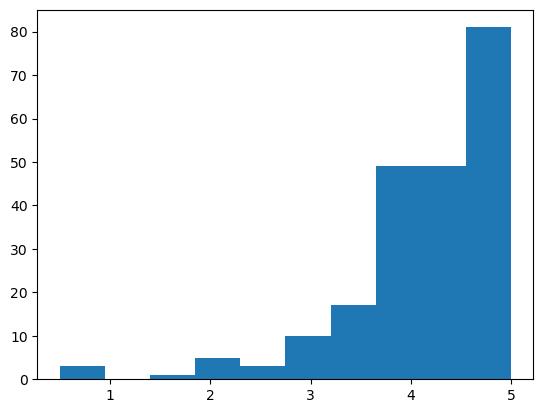

In [126]:
#plotting ratings on histogram
import matplotlib.pyplot as plt
plt.hist(fight_df["rating"],bins=10)

- hence it is Left Skewed Distribution

## Mandatory operations


1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

In [127]:
movie_ratings_summary = ratings_df.groupby('movieId').agg({
    'rating': ['count', 'mean']
}).reset_index()

# Rename the columns for clarity
movie_ratings_summary.columns = ['movieId', 'RatingCount', 'MeanRating']

print(movie_ratings_summary)

      movieId  RatingCount  MeanRating
0           1          215    3.920930
1           2          110    3.431818
2           3           52    3.259615
3           4            7    2.357143
4           5           49    3.071429
...       ...          ...         ...
9719   193581            1    4.000000
9720   193583            1    3.500000
9721   193585            1    3.500000
9722   193587            1    3.500000
9723   193609            1    4.000000

[9724 rows x 3 columns]


In [129]:
merged_df = pd.merge(movies_df, movie_ratings_summary, on='movieId', how='inner')
merged_df

,movieId,title,genres,RatingCount,MeanRating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [130]:
filtered_movies = merged_df[merged_df['RatingCount'] > 50]
filtered_movies

,movieId,title,genres,RatingCount,MeanRating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


##  9 )Which movie is the most popular based on  average user ratings?


In [132]:
# Sort the DataFrame by 'MeanRating' in descending order
sorted_movies = filtered_movies.sort_values(by='MeanRating', ascending=False)

# the movie with the highest average rating
most_popular_movie = sorted_movies.head(1)
most_popular_movie

,movieId,title,genres,RatingCount,MeanRating
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022


- Shawshank Redemption, The (1994)  is the most popular based on average user ratings


## 10) Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [137]:
top5_popular_movies = filtered_movies.sort_values(by='RatingCount', ascending=False).head(5)
top5_popular_movies


,movieId,title,genres,RatingCount,MeanRating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


## 11) Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [142]:
# Filter Sci-Fi movies
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi', case=False, na=False)]
sci_fi_movies

,movieId,title,genres,RatingCount,MeanRating
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177,3.983051
133,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
145,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355
176,208,Waterworld (1995),Action|Adventure|Sci-Fi,115,2.913043
...,...,...,...,...,...
7675,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,69,3.869565
7749,91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,54,3.435185
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [143]:
# Sort Sci-Fi movies by 'RatingCount' in descending order
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='RatingCount', ascending=False)
# the third most popular Sci-Fi movie
third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]
third_most_popular_sci_fi_movie

movieId                                     480
title                      Jurassic Park (1993)
genres         Action|Adventure|Sci-Fi|Thriller
RatingCount                                 238
MeanRating                                 3.75
Name: 418, dtype: object

-  Sci-Fi movie is "third most popular" based on the number of user ratings is " Jurassic Park (1993)"

## Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details

In [158]:
links_df = pd.read_csv('links.csv')
links_df

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [164]:
import requests
import numpy as np
import bs4

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = bs4.BeautifulSoup(response.text,"html.parser")
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan


In [165]:
scrapper(5476944)

'7.6'

In [180]:
ratings=[]
for i in links_df['imdbId'][:5]:
    scrapper(i)
    ratings.append(scrapper(i))
    

In [181]:
ratings

['8.3', '7.1', '6.6', '6.0', '6.1']

In [186]:
new_df=filtered_movies.head(5)

## Mention the movieId of the movie which has the highest IMDB rating.


In [190]:
sorted_movies = new_df.sort_values(by='imdb_rating', ascending=False)

# the movie with the highest average rating
most_popular_movie = sorted_movies.head(1)
most_popular_movie

,movieId,title,genres,RatingCount,MeanRating,imdb_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.92093,8.3


## Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [195]:
movie_links=filtered_movies.merge(right=links_df,how='inner',on='movieId')
movie_links

,movieId,title,genres,RatingCount,MeanRating,imdbId,tmdbId,imdb_url
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,https://www.imdb.com/title/114709/
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,https://www.imdb.com/title/113497/
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,https://www.imdb.com/title/113228/
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,https://www.imdb.com/title/113277/
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,https://www.imdb.com/title/114319/
...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0,https://www.imdb.com/title/993846/
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0,https://www.imdb.com/title/2278388/
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,https://www.imdb.com/title/816692/
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,https://www.imdb.com/title/2015381/


In [ ]:
movie_links['imdb_ratings']=movie_links['imdbId'].apply(lambda x:scrapper(str(x)))
movie_links

In [ ]:
movie_links.sort_values(by='imdb_ratings',ascending=False).head()

In [ ]:
scifi_movies=movie_links[movie_links['genres'].str.contains('Sci-Fi')]
scifi_movies.head()

In [ ]:
scifi_movies.sort_values(by='imdb_ratings',ascending=False).head()
